# Guided Project #11
### Finding the Best Markets to Advertise In
Let's assume that we're working for an an e-learning company that offers courses on programming. Most of our courses are on web and mobile development, but we also cover many other domains, like data science, game development, etc. We want to promote our product and we'd like to invest some money in advertisement. Our goal in this project is to find out the two best markets to advertise our product in.

To reach our goal, we could organize surveys for a couple of different markets to find out which would the best choices for advertising. This is very costly, however, and it's a good call to explore cheaper options first.

We can try to search existing data that might be relevant for our purpose. One good candidate is the data from [freeCodeCamp's 2017 New Coder Survey](https://medium.freecodecamp.org/we-asked-20-000-people-who-they-are-and-how-theyre-learning-to-code-fff5d668969). [freeCodeCamp](https://www.freecodecamp.org/) is a free e-learning platform that offers courses on web development. Because they run [a popular Medium publication](https://medium.freecodecamp.org/) (over 400,000 followers), their survey attracted new coders with varying interests (not only web development), which is ideal for the purpose of our analysis.

The survey data is publicly available in this [GitHub repository](https://github.com/freeCodeCamp/2017-new-coder-survey).

In [73]:
import pandas as pd

survey = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv')
survey.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
survey.shape

(18175, 136)

Once you're done with this initial exploration, add some context for readers and discuss:

- Why you're using a ready-made data set instead of organizing a survey.
- What's this data set about.
- Where can this data set be downloaded.

For the purpose of our analysis, we want to answer questions about a population of new coders that are interested in the subjects we teach. We'd like to know:

- Where are these new coders located.
- What are the locations with the greatest number of new coders.
- How much money new coders are willing to spend on learning.

Before starting to analyze the sample data we have, we need to clarify whether it's representative for our population of interest and it has the right categories of people for our purpose.

The <span style="color:red">JobRoleInterest</span> column describes for every participant the role(s) they'd be interested in working. Let's take a look at a frequency distribution table for this column.

In [75]:
# frequency table in percentage
survey['JobRoleInterest'].value_counts()/sum(survey['JobRoleInterest'].value_counts())*100

Full-Stack Web Developer                                                                                                                                                                                                11.770595
  Front-End Web Developer                                                                                                                                                                                                6.435927
  Data Scientist                                                                                                                                                                                                         2.173913
Back-End Web Developer                                                                                                                                                                                                   2.030892
  Mobile Developer                                                                              

#### Analyzing the table.
- Are people interested in only one subject or they can be interested in more than one subject?
- If most people are interested in more than one subject, is this sample still representative?
- The focus of our courses is on web and mobile development. How many people are interested in at least one of these two subjects?

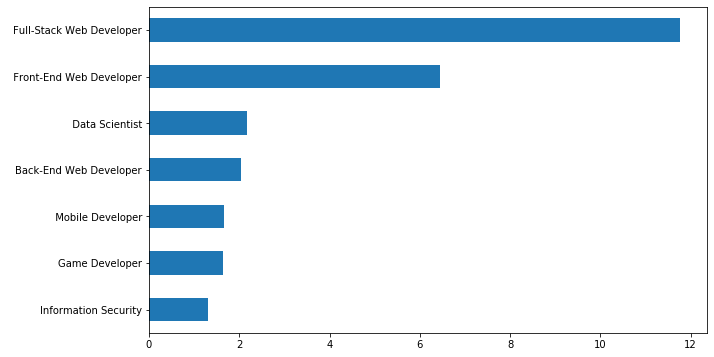

In [76]:
%matplotlib inline
freq = survey['JobRoleInterest'].value_counts()/sum(survey['JobRoleInterest'].value_counts())*100
freq[freq>=1].sort_values().plot.barh(figsize=(10,6))

One indicator of a good market is the number of potential customers — the more potential customers in a market, the better. If our ads manage to convince 10% of the 5000 potential customers in market A to buy our product, then this is better than convincing 100% of the 30 potential customers in market B.

To make sure we're working with a representative sample, let's drop all the rows where participants didn't answer what role they are interested in. Where a participant didn't respond, we can't know for sure what their interests are, so it's better if we leave out this category of participants.

In [77]:
survey = survey[~survey['JobRoleInterest'].isna()]
survey.shape

(6992, 136)

In [78]:
survey['CountryLive'].value_counts().head()

United States of America    3125
India                        528
United Kingdom               315
Canada                       260
Poland                       131
Name: CountryLive, dtype: int64

In [79]:
(survey['CountryLive'].value_counts()/len(survey['CountryLive'])*100).head()

United States of America    44.693936
India                        7.551487
United Kingdom               4.505149
Canada                       3.718535
Poland                       1.873570
Name: CountryLive, dtype: float64

#### Money spent per month
Let's create a new column that describes the amount of money a student has spent per month (at the moment they completed the survey).

In [80]:
def money_per_month(row):
    money = row['MoneyForLearning']
    months = row['MonthsProgramming']
    return money if months == 0 else money/months

for index,row in survey.iterrows():
    survey.loc[index,'MoneyPerMonth'] = money_per_month(row)
    
survey.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MoneyPerMonth
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.333333
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,200.000000
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.000000
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
6,29.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


In [81]:
sum(survey['MoneyPerMonth'].isna())

675

In [82]:
sum(survey['CountryLive'].isna())

154

In [83]:
# cleaning out null Money and Country rows
survey = survey[survey['MoneyPerMonth'].notna()]
survey = survey[survey['CountryLive'].notna()]
survey.shape

(6212, 137)

In [97]:
countries = list(survey['CountryLive'].value_counts().head(4).index)
countries

['United States of America', 'India', 'United Kingdom', 'Canada']

In [98]:
survey[survey['CountryLive'].isin(countries)].groupby('CountryLive').mean()['MoneyPerMonth']

CountryLive
Canada                      113.510961
India                       135.100982
United Kingdom               45.534443
United States of America    227.997996
Name: MoneyPerMonth, dtype: float64

Let's generate four box plots on the same figure to visualize for each country (the US, India, the United Kingdom, Canada) the distribution of the variable that describes how much money each participant had spent per month.

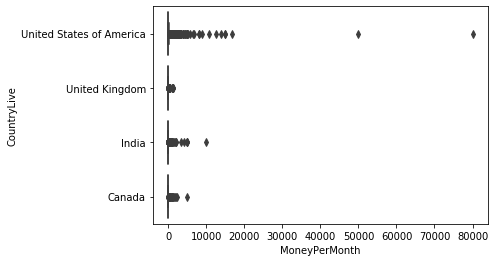

In [117]:
import seaborn as sns

sns.boxplot(data=survey[survey['CountryLive'].isin(countries)], y='CountryLive', x='MoneyPerMonth')

In [119]:
len(survey[survey['MoneyPerMonth']>=5000])

37

In [121]:
survey[survey['MoneyPerMonth']>=5000][['CountryLive','MoneyForLearning','MonthsProgramming']]

,CountryLive,MoneyForLearning,MonthsProgramming
712,Australia,20000.0,1.0
718,United States of America,8000.0,1.0
1222,United States of America,13000.0,2.0
1728,India,20000.0,4.0
2197,Austria,12000.0,1.0
2478,United States of America,100000.0,2.0
3145,United States of America,17000.0,3.0
3184,United States of America,9000.0,0.0
3798,New Zealand,15000.0,2.0
3930,United States of America,65000.0,6.0


In [122]:
len(survey)

6212

Let's remove those 37 

In [123]:
survey = survey[survey['MoneyPerMonth']<5000]

In [125]:
survey = survey[survey['CountryLive'].isin(countries)]

In [126]:
survey.shape

(3890, 137)

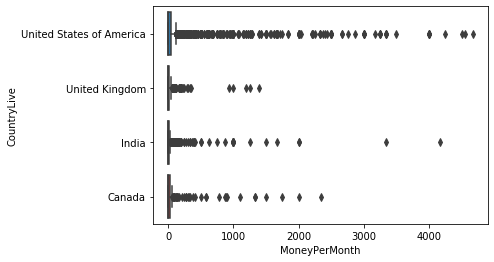

In [137]:
sns.boxplot(data=survey[survey['MoneyPerMonth']<5000], x='MoneyPerMonth', y='CountryLive')

In [128]:
len(survey[survey['MoneyPerMonth']>=5000])

0

In [136]:
# means without outliers:
survey.groupby('CountryLive').mean()['MoneyPerMonth']

CountryLive
Canada                       93.065400
India                        81.812102
United Kingdom               45.534443
United States of America    130.639017
Name: MoneyPerMonth, dtype: float64

In [138]:
# volume of potential markets:
survey['CountryLive'].value_counts()

United States of America    2913
India                        459
United Kingdom               279
Canada                       239
Name: CountryLive, dtype: int64

Try to choose the second market to advertise in.

- Remember that we sell subscriptions at a price of $59 per month.
- Make sure you also consider the number of potential customers in each country.

Based on all of the results you've found so far, brainstorm a couple of possible decisions.

- Does it make sense to advertise in more then two countries?
- Does it make sense to split the advertising budget unequally (e.g.: spend 70% to advertise in the US and 30% to advertise in India)?
- Does it make sense to advertise only in the US?
- If we had a marketing team in our company, would it be better to just send them our results and let them use their domain knowledge to take the best decision?

Curious to see what other students have done on this project? Head over to our [Community](https://community.dataquest.io/tags/c/social/share/49/310) to check them out. While you are there, please remember to show some love and give your own feedback!